In [1]:
import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import math

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pyproj import Proj
from scipy.stats import kde
from matplotlib.ticker import MaxNLocator

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Read data

In [2]:
blue_0624 = rasterio.open('2020.06.24.blue.lzw.tif')
green_0624 = rasterio.open('2020.06.24.green.lzw.tif')
red_0624 = rasterio.open('2020.06.24.red.lzw.tif')
swir1_0624 = rasterio.open('2020.06.24.swir1.lzw.tif')
swir2_0624 = rasterio.open('2020.06.24.swir2.lzw.tif')
nir_0624 = rasterio.open('2020.06.24.nir.lzw.tif')

blue_0715 = rasterio.open('2020.07.15.blue.lzw.tif')
green_0715 = rasterio.open('2020.07.15.green.lzw.tif')
red_0715 = rasterio.open('2020.07.15.red.lzw.tif')
swir1_0715 = rasterio.open('2020.07.15.swir1.lzw.tif')
swir2_0715 = rasterio.open('2020.07.15.swir2.lzw.tif')
nir_0715 = rasterio.open('2020.07.15.nir.lzw.tif')

blue_1003 = rasterio.open('2020.10.03.blue.lzw.tif')
green_1003 = rasterio.open('2020.10.03.green.lzw.tif')
red_1003 = rasterio.open('2020.10.03.red.lzw.tif')
swir1_1003 = rasterio.open('2020.10.03.swir1.lzw.tif')
swir2_1003 = rasterio.open('2020.10.03.swir2.lzw.tif')
nir_1003 = rasterio.open('2020.10.03.nir.lzw.tif')

df = pd.read_excel('Plant.biomass.Reifsteck.2020.xlsx')

In [3]:
#check EPSG
print(blue_0624.crs)

EPSG:32616


## Convert coordinate

In [4]:
LLPoint = list(zip(df['Longitude'], df['Latitude']))
p = Proj(proj = 'utm', zone = 16, ellps = 'WGS84', preserve_units = False)

points = []
for point in LLPoint:
    x, y = p(point[0], point[1])
    temp = (x, y)
    points.append(temp)

In [5]:
# find value of corresponding point

data_blue_0624 = np.array(list(rasterio.sample.sample_gen(blue_0624, points, 1))).flatten()
data_green_0624 = np.array(list(rasterio.sample.sample_gen(green_0624, points, 1))).flatten()
data_red_0624 = np.array(list(rasterio.sample.sample_gen(red_0624, points, 1))).flatten()
data_swir1_0624 = np.array(list(rasterio.sample.sample_gen(swir1_0624, points, 1))).flatten()
data_swir2_0624 = np.array(list(rasterio.sample.sample_gen(swir2_0624, points, 1))).flatten()
data_nir_0624 = np.array(list(rasterio.sample.sample_gen(nir_0624, points, 1))).flatten()
new_feature_0624 = (data_nir_0624 - data_red_0624)/(data_nir_0624 + data_red_0624)

data_blue_0715 = np.array(list(rasterio.sample.sample_gen(blue_0715, points, 1))).flatten()
data_green_0715 = np.array(list(rasterio.sample.sample_gen(green_0715, points, 1))).flatten()
data_red_0715 = np.array(list(rasterio.sample.sample_gen(red_0715, points, 1))).flatten()
data_swir1_0715 = np.array(list(rasterio.sample.sample_gen(swir1_0715, points, 1))).flatten()
data_swir2_0715 = np.array(list(rasterio.sample.sample_gen(swir2_0715, points, 1))).flatten()
data_nir_0715 = np.array(list(rasterio.sample.sample_gen(nir_0715, points, 1))).flatten()
new_feature_0715 = (data_nir_0715 - data_red_0715)/(data_nir_0715 + data_red_0715)

data_blue_1003 = np.array(list(rasterio.sample.sample_gen(blue_1003, points, 1))).flatten()
data_green_1003 = np.array(list(rasterio.sample.sample_gen(green_1003, points, 1))).flatten()
data_red_1003 = np.array(list(rasterio.sample.sample_gen(red_1003, points, 1))).flatten()
data_swir1_1003 = np.array(list(rasterio.sample.sample_gen(swir1_1003, points, 1))).flatten()
data_swir2_1003 = np.array(list(rasterio.sample.sample_gen(swir2_1003, points, 1))).flatten()
data_nir_1003 = np.array(list(rasterio.sample.sample_gen(nir_1003, points, 1))).flatten()
new_feature_1003 = (data_nir_1003 - data_red_1003)/(data_nir_1003 + data_red_1003)

data_1 = df['Dry biomass (Mg/ha)'].tolist()
rounded_1 = [round(num, 1) for num in data_1]

data_2 = df['Dry biomass (Mg/ha).1'].tolist()
rounded_2 = [round(num, 1) for num in data_2]

data_3 = df['Dry biomass (Mg/ha).2'].tolist()
rounded_3 = [round(num, 1) for num in data_3]

x = []
y = []

for i in range(len(rounded_1)):
    if not (math.isnan(rounded_1[i])):
        temp = [data_blue_0624[i]/10000, data_green_0624[i]/10000, data_red_0624[i]/10000, data_nir_0624[i]/10000, data_swir1_0624[i]/10000, data_swir2_0624[i]/10000, new_feature_0624[i]]
        x.append(temp)
        y.append(rounded_1[i])
for i in range(len(rounded_2)):
    if not (math.isnan(rounded_2[i])):
        temp = [data_blue_0715[i]/10000, data_green_0715[i]/10000, data_red_0715[i]/10000, data_nir_0715[i]/10000, data_swir1_0715[i]/10000, data_swir2_0715[i]/10000, new_feature_0715[i]]
        x.append(temp)
        y.append(rounded_2[i])
for i in range(len(rounded_3)):
    if not (math.isnan(rounded_3[i])):
        temp = [data_blue_1003[i]/10000, data_green_1003[i]/10000, data_red_1003[i]/10000, data_nir_1003[i]/10000, data_swir1_1003[i]/10000, data_swir2_1003[i]/10000, new_feature_1003[i]]
        x.append(temp)
        y.append(rounded_3[i])

## Initialize model

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
rf_model = RandomForestRegressor(max_depth=15, random_state=0)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

In [7]:
def des_scatter_plot(y_true: np.ndarray, y_pred: np.ndarray, label_name: str, save_path: str, ax: plt.Axes = None):
    # assert (save_path is not None and ax is None) or (save_path is None and ax is not None)
    save_fig = ax is None and save_path is not None

    # Evaluate a gaussian kde on a regular grid of n_bins x n_bins over data extents
    # Calculate the point density
    xy = np.vstack([y_pred, y_true])
    colors = kde.gaussian_kde(xy)(xy)

    # r2 = r2_score(y_true=y_true, y_pred=y_pred)
    r2 = np.corrcoef(y_true, y_pred)[0, 1] ** 2
    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
    bias = float(np.mean(y_pred - y_true))
    range_ = np.max(y_true) - np.min(y_true)

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    # ax.scatter(x=y_pred, y=y_true, c=colors, s=80, alpha=1)
    # ax.scatter(x=y_pred, y=y_true, s=80, alpha=1, edgecolors="k")
    ax.scatter(x=y_pred, y=y_true, s=80, c=colors, alpha=1)
    # ax.set_title(label_name)

    ax.set_xlabel("Predicted Value")
    ax.set_ylabel("Actual Value")
    txt = f"RMSE = {rmse:.2f} ({(rmse / range_ * 100):.2f}%)\n" \
          f"Bias = {bias:.2f} ({(bias / range_ * 100):.2f}%)\n" \
          f"$R^2$ = {r2:.2f}\n"
    # f"MAE = {round(mae, 2)} ({round(mae / y_true.mean() * 100, 2)} %)\n"
    axis_min, axis_max = 0, max(np.max(y_true), np.max(y_pred))
    # axis_min = max(5 * round(axis_min - np.abs(axis_max - axis_min) * 0.05) / 5, 0)
    # axis_max = 5 * round((axis_max + np.abs(axis_max - axis_min) * 0.3) / 5 + 1)
    if label_name.lower() == "residue":
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
    else:
        ax.set_xlim(axis_min, axis_max)
        ax.set_ylim(axis_min, axis_max)
    ax.plot(
        [-1000, 1000],
        [-1000, 1000],
        linestyle='--', color='k'
    )
    ya, xa = ax.get_yaxis(), ax.get_xaxis()
    locator = MaxNLocator(nbins=5, min_n_ticks=3, steps=[2, 5, 10], integer=True)
    locator.view_limits(axis_min, axis_max)
    ya.set_major_locator(locator)
    xa.set_major_locator(locator)
    ax.annotate(text=txt, xy=(0.02, 0.70), xycoords='axes fraction', color="red")
    if save_fig:
        plt.savefig(save_path, dpi=500)
    elif not ax:
        plt.show()

## Report

C:\Users\Windows10\AppData\Local\Temp\ipykernel_10620\1313179612.py:8: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  colors = kde.gaussian_kde(xy)(xy)


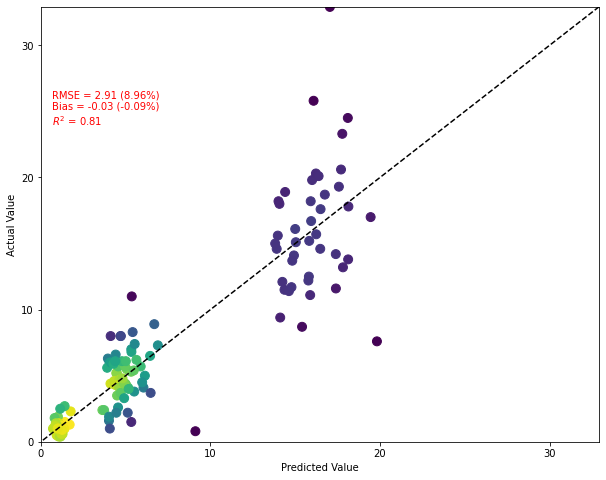

In [65]:
des_scatter_plot(y_test, y_pred, '', 'report')